# Author: Rajdeep Saha

# Task 6- Prediction using Decision Tree Algorithm

# GRIP @ The Sparks Foundation

In this task, I have run the decision tree algorithm and visualized it graphically. The purpose of this task is to predict the right class for any new data.

# Step 1- Loading Necessary Libraries

In [1]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# Step 2- Accessing the Data

In [3]:
setwd("C:/Users/user/OneDrive/Desktop/Sparks/Task 6")
data<-read.csv("iris.csv")
attach(data)
names(data)

The following objects are masked from data (pos = 3):

    Id, PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm,
    Species




[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"

# Step 3- Observing the Data


In [4]:
head(data,10)
data<-data[,-1]
head(data,5)
str(data)
summary(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


'data.frame':	150 obs. of  5 variables:
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   Species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

# Step 4- Visualizing the Data

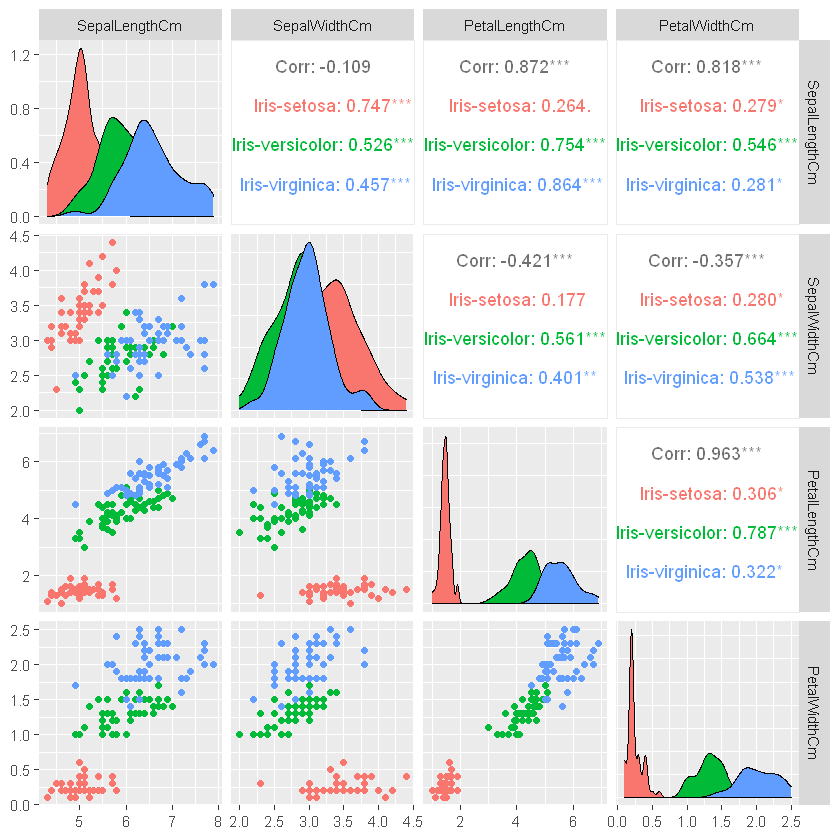

In [8]:
ggpairs(data[,1:4],aes(col=Species))

# Step 5- Train-Test Split

In [7]:
set.seed(1)
index=sample(1:nrow(data),floor(0.80*nrow(data)))
train=data[index,]
test=data[-index,]
print("Train-Test split was successful.")

[1] "Train-Test split was successful."


# Step 6- Model Training using Decision Tree Classifier

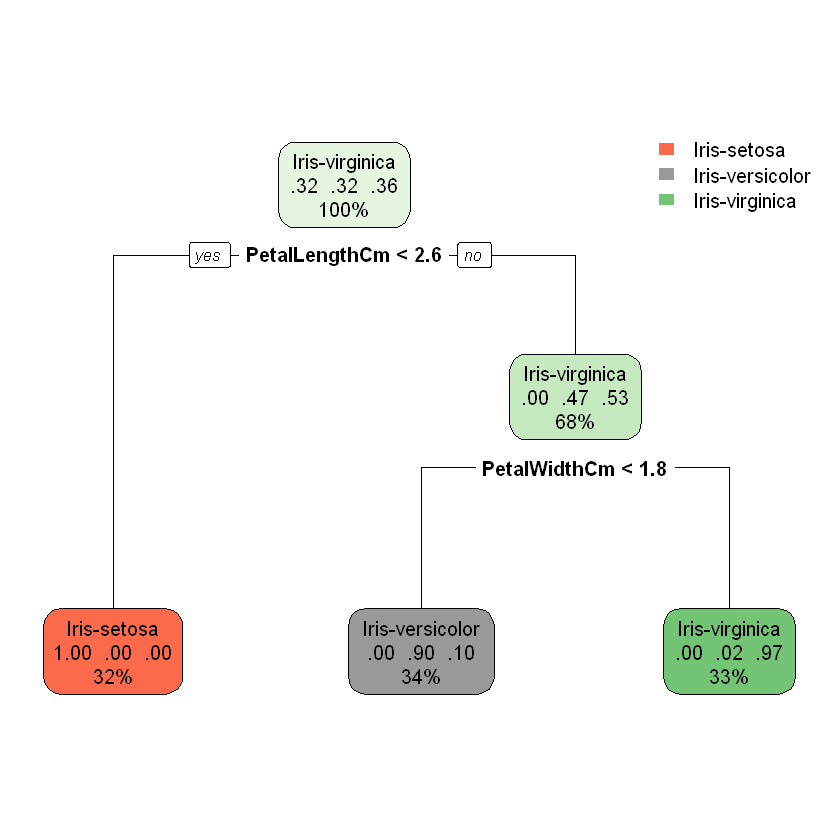

In [9]:
tree.iris=rpart(as.factor(Species)~.,data=train,method="class")
rpart.plot(tree.iris)
opt<-which.min(tree.iris$cptable[,'xerror'])
cp <-tree.iris$cptable[opt, 'CP']
prune.tree<-prune(tree.iris,cp)
rpart.plot(prune.tree)

# Step 7- Prediction on Test Data

In [10]:
predicted_species=predict(prune.tree,test,type="class")
actual_species=test$Species
table(predicted_species,actual_species)

                 actual_species
predicted_species Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              11               0              0
  Iris-versicolor           0              12              1
  Iris-virginica            0               0              6

From the contingency table, we can see that, only one observation is misclassified, which shows, the model can be well used to predict the class of new observation.

# Step 8- Model Accuracy

In [11]:
accuracy=mean(predicted_species==actual_species)*100
paste("Model Accuracy:",round(accuracy,2),"%")

[1] "Model Accuracy: 96.67 %"

We can see that our model is 96.67% accurate, which is really good.

# Conclusion

I have successfully carried out prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.

# Thank You